<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib as mb
import numpy as np
from termcolor import colored
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
#сохранение в переменную и изучение данных
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


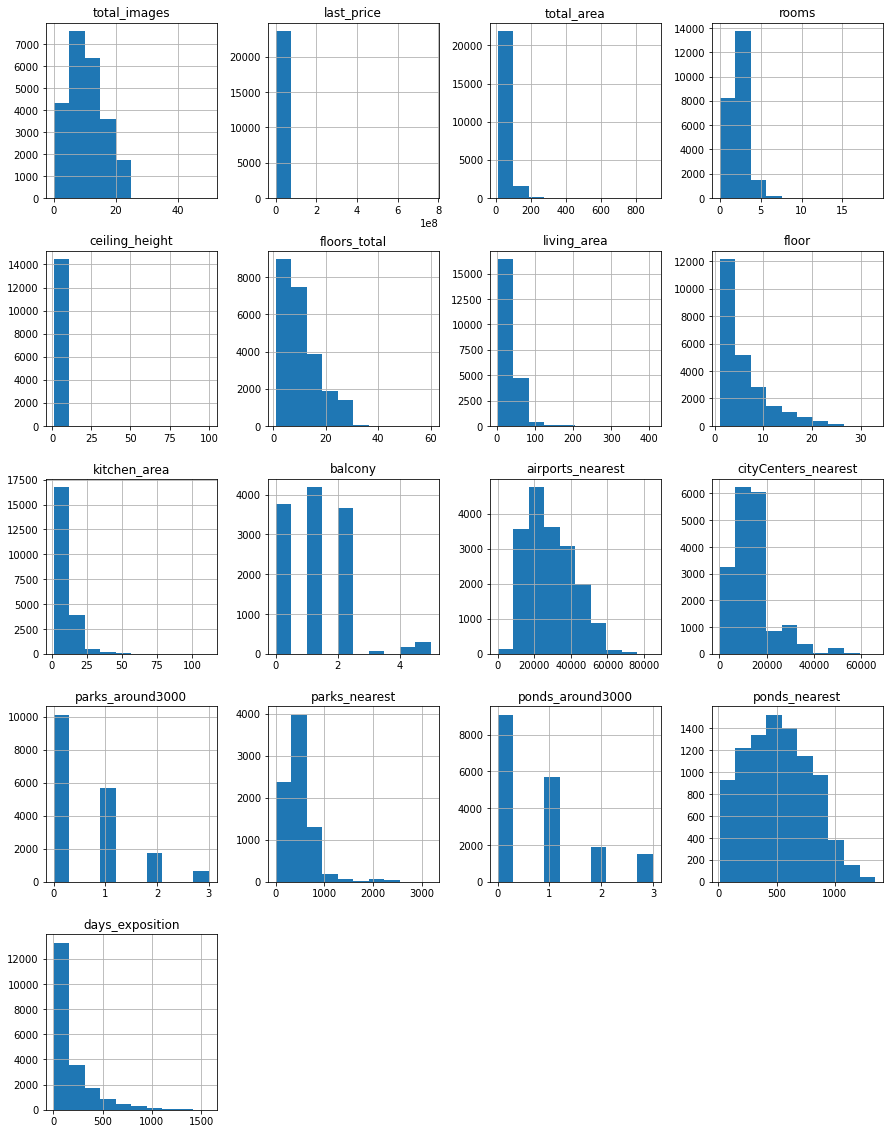

In [3]:
#гистограмма df
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> знак добавлен)
</div>

In [4]:
#общая инф-ия по df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Датафрейм содержит всего 23699 строк. В данных обнаружены следующие проблемы: пропуски и неправильный тип данных. Пропусков нет только в 8 из 21 столбцах, и значения нужно перевести в 8 из 21 столбцах. К примеру, в столбце first_day_exposition требуется поменять тип на дату, так как дата в формате object может быть задействована не во всех вычилениях. А целочисленные значения, записанные в int, становятся читабельнее, чем в формате float 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

In [5]:
#находим пропуски в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#поправим нулевые значения в столбце с комнатами. нули могут исказить данные на этапе расчетов и визуализации, поэтому берем минимум 
data['rooms'] = data['rooms'].replace(0, 1)

In [7]:
#устраняем некоторые пропуски
data[['balcony', 'locality_name', 'ponds_around3000', 'parks_around3000']] = data[['balcony', 'locality_name', 'ponds_around3000', 'parks_around3000']].fillna({'balcony':0, 'locality_name':'Нет_данных', 'parks_around3000':0, 'ponds_around3000':0})
data['is_apartment'] = data['is_apartment'].fillna(False)

# заполняем средним значением высоту потолка (потолки обычно не сильно отличаются в квартирах, можно заполнить без группировки)
data['ceiling_height'] = data['ceiling_height']. fillna(data['ceiling_height'].mean())

# # заполняем средним значением в зависимости от области - например в селе +- будут одинаковое кол-во этажей
# # число этажей - группируем по области и берем оттуда среднее, округленное (round), но оно не может быть меньше этажа 
data['floors_total'] = data.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.mean()))
data['floors_total'] = round(data['floors_total'])
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor']
print(colored('Строк в датафрейме, где этаж выше этажей в доме: ' + str(data.query('floor > floors_total')['total_area'].count()), 'magenta'))

# если у нас апартамент - тогда жилплощадь и кухня = общая площадь. иначе - делим общую площадь на кол-во комнат и заполняем пропуски
data.loc[data['is_apartment'] == True, 'living_area'] = data.loc[data['is_apartment'] == True, 'living_area'].fillna(data.loc[data['is_apartment'] == True, 'total_area'])
data.loc[data['is_apartment'] == True, 'kitchen_area'] = data.loc[data['is_apartment'] == True, 'kitchen_area'].fillna(data.loc[data['is_apartment'] == True, 'total_area'])

data.loc[data['is_apartment'] == False, 'living_area'] = data.loc[data['is_apartment'] == False, 'living_area'].fillna(data.loc[data['is_apartment'] == False, 'total_area'] / data.loc[data['is_apartment'] == False, 'rooms'])
data.loc[data['is_apartment'] == False, 'kitchen_area'] = data.loc[data['is_apartment'] == False, 'kitchen_area'].fillna(data.loc[data['is_apartment'] == False, 'total_area'] / data.loc[data['is_apartment'] == False, 'rooms'])

# по округе - если она у нас не ноль и не город, то смотрим по округе среднее значение для прудов, парков, аэропорта и центра, тк тут речь идет о маленьких поселениях. Если у нас Спб - тогда берем максимальное, тк город большой. В противном случае признаем, что всего этого нет и ставим 0
data.loc[data['locality_name'] != 'Санкт-Петербург', 'airports_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data['airports_nearest'] = data['airports_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'parks_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'parks_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('mean'))
data['parks_nearest'] = data['parks_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'ponds_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ponds_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('mean'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

data.isna().sum()

Строк в датафрейме, где этаж выше этажей в доме: 0


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Пропуски заполнены верно!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Разбивай, пожалуйста, код на несколько ячеек. Так будет более наглядно и проще комментировать твой код
</div>

<font color='teal'>***Почему могли "потеряться" данные?***                                                               


Полагаю, все столбцы до balcony включительно заполнял человек, а все, что идет далее, заполнялось автоматически. Поэтому разделю возможные причины пропусков в значениях на условные 2 группы.
    
    1.1 Обычная невнимательность\нежелание человека заполнять данные о квартире. К примеру, высота потолка. Очевидно, в каждой квартире есть потолок. А вот измерять его не очень удобно, надо подниматься, лестницу доставать. Думаю, 9195 из 23699 (39%) собственников как раз могли полениться указать потолок
    1.2 Человек не заполнил данные, которые он не счел нужным заполнять. К примеру, если балкона нет, то собственник может и пропустить это поле. Точно так же и с апартаментами, если не указано ничего - скорее всего, это не апартаменты, т.е. False.Даже если рассматривать пропуски с числом этажей нельзя отрицать, что дом может быть одноэтажным. Или, что это - апартаменты, в них сложно выделить отдельно кухню, отдельно жилплощадь. Заметно, что в общей площади пропусков совсем нет
    2.1 Та часть, которую (по своему предположению) я отношу к части, заполненной автоматически, не имеет полностью заполненных столбцов. Тут дело может быть в технической ошибке(особенно, если смотреть на кол-во дней с момента размещения объявления собственником) или в отсутствии картографических данных. Даже можно увидеть +- одинаковое кол-во отсутсвующих значений в столбцах с расстоянием до аэропорта, центра города, кол-ву парков и прудов, очень вероятно, что тут дело именно в отсутствии картографических данных.
    3. Отдельно выделю столбец с наименованием района/области. Его мог заполнять как человек, так и компьютер. Маленькое кол-во пропущенных значений больше указывает на первый вариант, человек мог просто не указать эти данные, если он указал адрес, который не попал в датафрейм. Но и автоматически эти данные могли бы собираться, ведь по какому-то признаку определяется расстояние от дома до значимых мест, значит и расположение известно. Во втором случае речь может идти об отсутсвии картографических данных

In [8]:
#правим тип данных
d = ['balcony','last_price','ponds_around3000', 'parks_around3000', 'floors_total', 'studio', 'open_plan']
for i in d:
    data[i]=data[i].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  int64         
 11  open_plan             23699 non-null  int64         
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

<font color='teal'>***Почему надо менять тип данных?*** 
    
    1. Тип данных был изменен с float на int в столбцах со значением цены (вряд ли цену на квартиру указали бы в точности до копеек), кол-ву прудов рядом, кол-ву парков рядом, кол-ву этажей и кол-ву балконов. Очевидно, дробных чисел здесь быть не может. Дробные числа почти не отличаются от целочисленных, однако, возможностей с ними больше, поскольку дроби поддерживают не все арифметические функции, что поддерживает int
    2. Тип данных с булева значения на int был изменен для столбцов, в которых содержится информация по соотвествию апартаментам, студии и открытой планировке. Данные типа boolean не попали в гистограммы, а их соотношения бы очень хотелось увидеть на графике. Так же с int проще будет проводить расчеты, не прибегая лишний раз к pivot_table
    3. Тип данных с object на datetime для столбца first_day_exposition. Дату и время иногда нужно вводить в арифметические операции, поэтому и нужно менять тип
    

In [9]:
#ищем дубликаты
print(colored('НЕЯВНЫЕ ДУБЛИ', 'red'))
print()
for i in pd.Series(data['locality_name'].unique()).sort_values():
    print (i)
print()

#устраняем дубликаты
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'садоводческое некоммерческое', 'поселок станции'], ['городской поселок','садовое', 'поселок при железнодорожной станции'], regex=True)
) 

#проверяем
print(colored('ДУБЛИ УСТРАНЕНЫ', 'green'))
print()
for i in pd.Series(data['locality_name'].unique()).sort_values():
    print (i)

НЕЯВНЫЕ ДУБЛИ

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Нет_данных
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
дере

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [10]:
# убираем артефакты
col = pd.Series(data.columns)
for i in col:
    print(colored(i,'green'))
    print(data[i].max())
    print(data[i].min())
    print()


total_images
50
0

last_price
763000000
12190

total_area
900.0
12.0

first_day_exposition
2019-05-03 00:00:00
2014-11-27 00:00:00

rooms
19
1

ceiling_height
100.0
1.0

floors_total
60
1

living_area
494.1
2.0

floor
33
1

is_apartment
True
False

studio
1
0

open_plan
1
0

kitchen_area
494.1
1.3

balcony
5
0

locality_name
село Шум
Бокситогорск

airports_nearest
84869.0
0.0

cityCenters_nearest
65968.0
0.0

parks_around3000
3
0

parks_nearest
3190.0
0.0

ponds_around3000
3
0

ponds_nearest
1344.0
0.0

days_exposition
1580.0
1.0



<font color='teal'>*Как итог, мы проверили данные на неявные дубликаты и устранили их, проверили есть ли в данных артефакты. Для того, чтобы исключить дубликаты, мы привели признаки локации к "общему знаменателю". Далее мы рассмотрели минимальное значение и максимальное для каждого столбца, чтобы определить, не выходят ли рамки за пределы "нормальных"*

### Посчитайте и добавьте в таблицу новые столбцы

In [11]:
#цена одного квадратного метра
data['price_m2'] = round(data['last_price'] / data['total_area'],2)

#день недели публикации объявления
data['weekday_name'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month_name'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year_name'] = data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «первый», «последний», «другой»);

def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

#расстояние до центра города в километрах
data['cityCenters_nearest'] = round(data['cityCenters_nearest']/1000, 0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучим параметры датафрема

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


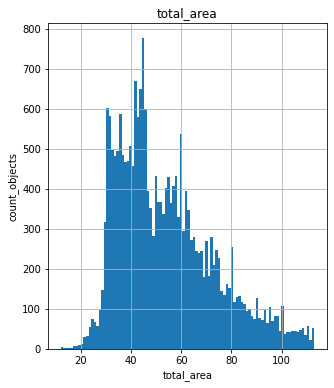

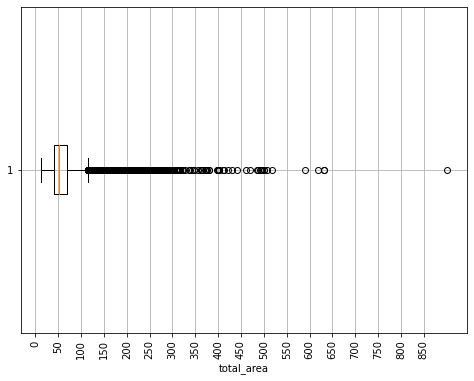

In [12]:
#total_area
print(data['total_area'].describe())
data['total_area'].hist(bins=100, grid=True, figsize=(5,6), range=(data['total_area'].min(),113))
plt.xlabel('total_area')
plt.ylabel('count_objects')
plt.title('total_area')
plt.show()

#смотрим аномалии через боксплот
fig, ax = plt.subplots(figsize=(8, 6))
boxplot = ax.boxplot(data['total_area'], vert=False)
ax.set_xlabel('total_area')
ax.set_xticks(range(0, 900, 50))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [13]:
# устраним аномалии 
data['total_area'] = data['total_area'].where((data['total_area'] <= 133) & (data['total_area'] >= 12))

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Аномалии срезаны из датафрейма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Для построения гистограммы мы предварительно проверили данные на аномалии методом "ящика с усами" - узнали границы "нормальных" данных (В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками (с. ЯП). Для того, чтобы отсечь выбросы и рассмотреть гистограмму внимательнее мы установили границы в пределах размаха, а именно 12м2 - 113 м2. Как итог, мы получили следующий диапазон метражей с наибольшим количеством объявлений: от 30 до 45 м2. 
</div>

count    23699.000000
mean        34.313397
std         21.759765
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        494.100000
Name: living_area, dtype: float64


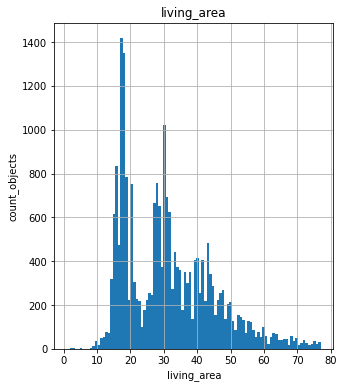

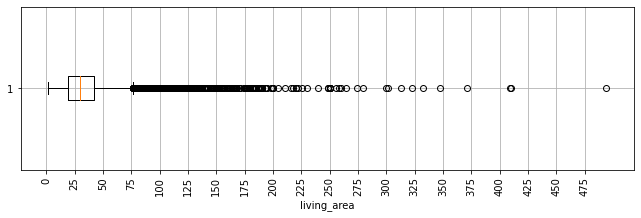

In [14]:
#living_area
print(data['living_area'].describe())
data['living_area'].hist(bins=100, grid=True, figsize=(5,6), range=(1,77))
plt.xlabel('living_area')
plt.ylabel('count_objects')
plt.title('living_area')
plt.show()

#смотрим аномалии через боксплот
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['living_area'], vert=False)
ax.set_xlabel('living_area')
ax.set_xticks(range(0, 495, 25))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [15]:
#удалим аномалии
data['living_area'] = data['living_area'].where((data['living_area'] <= 77) & (data['living_area'] >= 1))

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Аномалии срезаны из датафрейма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> При построении гистограммы пользовались аналогичным способом (см. total_area): проверили данные на аномалии методом "ящика с усами". Для того, чтобы отсечь выбросы и рассмотреть гистограмму внимательнее мы установили границы в пределах размаха, а именно 1м2 - 71 м2. Как итог, мы получили следующий диапазон метражей с наибольшим количеством объявлений: от 15 до 19 м2. 
</div>

count    23699.00000
mean        12.54664
std          9.70864
min          1.30000
25%          7.40000
50%         10.00000
75%         13.50000
max        494.10000
Name: kitchen_area, dtype: float64


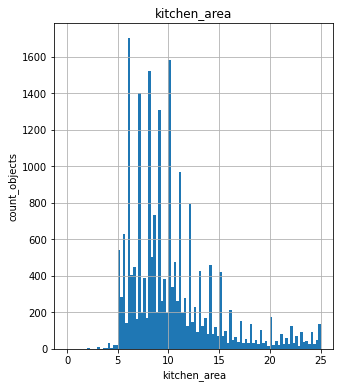

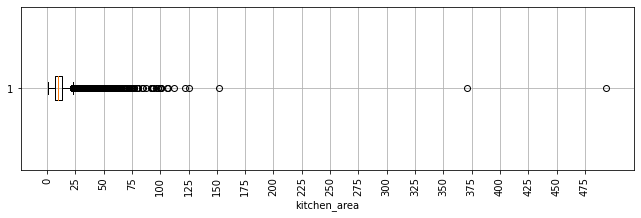

In [16]:
#kitchen_area
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=100, grid=True, figsize=(5,6), range=(0,25))
plt.xlabel('kitchen_area')
plt.ylabel('count_objects')
plt.title('kitchen_area')
plt.show()

#смотрим аномалии через боксплот
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['kitchen_area'], vert=False)
ax.set_xlabel('kitchen_area')
ax.set_xticks(range(0, 495, 25))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [17]:
#удалим аномалии
data['kitchen_area'] = data['kitchen_area'].where((data['kitchen_area'] <= 25) & (data['kitchen_area'] >= 1))

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Аномалии срезаны из датафрейма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Все действия проводились по аналогии предшествующим ячейкам с изучением параметров площади. Мы получили следующий диапазон метражей с наибольшим количеством объявлений: от 7 до 12 м2
</div>

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


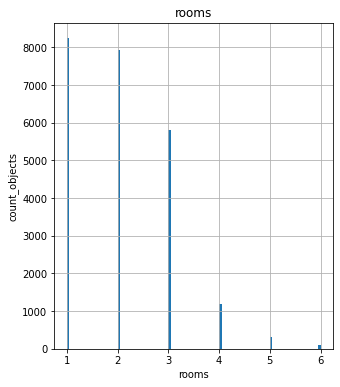

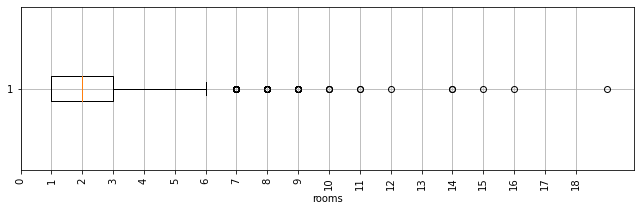

In [18]:
#rooms
print(data['rooms'].describe())
data['rooms'].hist(bins=100, grid=True, figsize=(5,6), range=(data['rooms'].min(),6))
plt.xlabel('rooms')
plt.ylabel('count_objects')
plt.title('rooms')
plt.show()

#аналогично проверяем аномалии
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['rooms'], vert=False)
ax.set_xlabel('rooms')
ax.set_xticks(range(0, 19, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [19]:
#удалим аномалии
data['rooms'] = data['rooms'].where((data['rooms'] <= 6) & (data['rooms'] >= 1))

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Аномалии срезаны из датафрейма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Проанализировав параметр и устраня из поля зрения выбивающиеся значения, мы получили такой итог: самая многочисленная группа объявлений - группа с однокомнатными квартирами. Тенденция без всплесков плавно снижается, а значит объявлений на двухкомнатные квартиры меньше, чем на однокомнатные. А на трехкомнатные меньше двухкомнатных и т.д.
</div>


count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


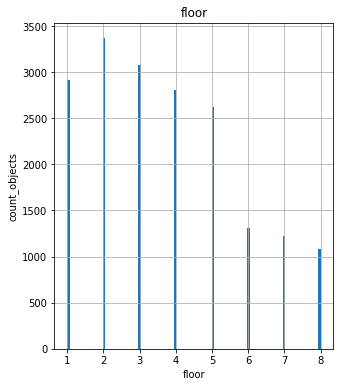

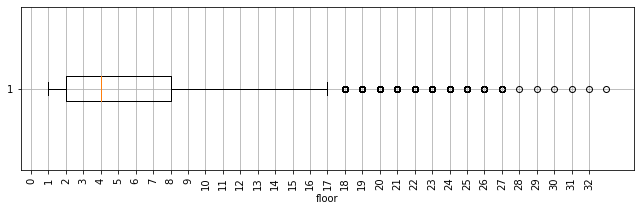

In [20]:
#floor
print(data['floor'].describe())
data['floor'].hist(bins=100, grid=True, figsize=(5,6), range=(data['floor'].min(),8))
plt.xlabel('floor')
plt.ylabel('count_objects')
plt.title('floor')
plt.show()

#проверяем аномалии
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['floor'], vert=False)
ax.set_xlabel('floor')
ax.set_xticks(range(0, 33, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Наиболее популярным среди объявлений является второй этаж, на втором месте по популярности - третий этаж, а третье место достается первому этажу. Далее кол-во предложений с бо'льшим этажом уменьшается, чем выше этаж - тем меньше можно найти по нему объявлений
</div>

count    23699.000000
mean        10.990717
std          9.649241
min          0.000000
25%          3.000000
50%         11.000000
75%         15.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64


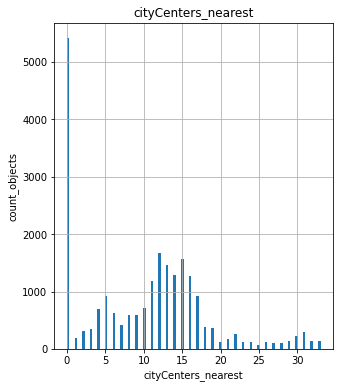

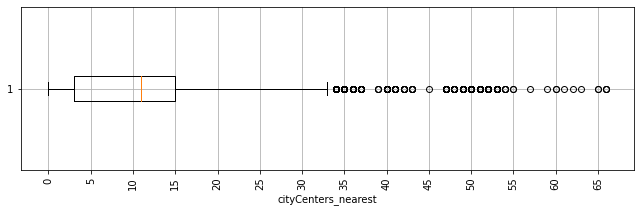

In [21]:
#cityCenters_nearest
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].hist(bins=100, grid=True, figsize=(5,6), range=(0,33))
plt.xlabel('cityCenters_nearest')
plt.ylabel('count_objects')
plt.title('cityCenters_nearest')
plt.show()

#проверяем аномалии
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['cityCenters_nearest'], vert=False)
ax.set_xlabel('cityCenters_nearest')
ax.set_xticks(range(0, 66, 5))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> График по кол-ву объявлений по близости центра напоминает распределение Пуассона - видим холм, который возрастает до определенного уровня, потом так же плавно начинает спускаться. Мы видим выброс на значении 0, но мы понимаем, что этот выброс - итог устранения пропущенных значений. Эту часть графика можно игнорировать. Также становится заметно, что значения могли указать с ошибкой, сложно представить расстояние до центра в 11 м. Полагаю, что расстояние в этом столбце указано в км, а не метрах. Если придерживаться моего понимания, то больше всего объявлений с диапазоном расстояния до центра от 11км до 16км.
</div>

count    23699.000000
mean       367.631245
std        293.195692
min          0.000000
25%          0.000000
50%        498.597886
75%        498.597886
max       3190.000000
Name: parks_nearest, dtype: float64


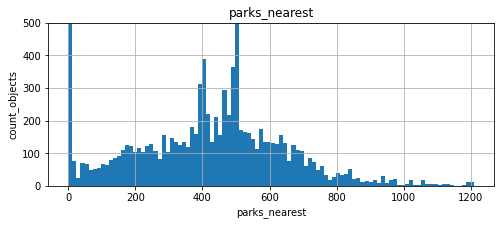

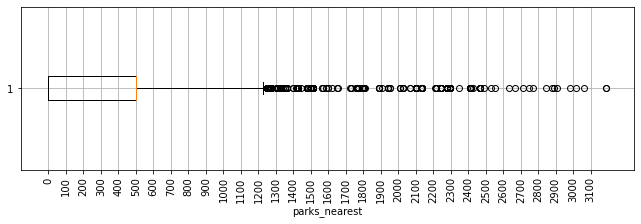

In [22]:
#parks_nearest
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=100, grid=True, figsize=(8,3), range=(data['parks_nearest'].min(),1210))
plt.xlabel('parks_nearest')
plt.ylabel('count_objects')
plt.ylim(0, 500) #обрежем аномально высокие столбцы, вызванные заполнением пропусков
plt.title('parks_nearest')
plt.show()

#аналогично проверяем аномалии
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['parks_nearest'], vert=False)
ax.set_xlabel('parks_nearest')
ax.set_xticks(range(0, 3200, 100))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Рассмотрев гистограмму, видно, что расстояние для парков - то же самое распределение Пуассона. Явно выбивается здесь одна колонка(~500м), которая образовалась вследствие устранения пропусков в данных. Самыми многочисленными объявлениями были объявления с расстоянием до парка от 390 до 490 м. Такие низкие значения сложно воспринимать, как возможную ошибку и переводить в километры (а в дециметрах люди никогда ничего не указывали), однако, попытаться объяснить их можно. Парком собственники жильня могли называть любой сквер рядом, который есть почти в любом дворе.
</div>

count    23699.000000
mean         2.744938
std          0.235528
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max         10.000000
Name: ceiling_height, dtype: float64


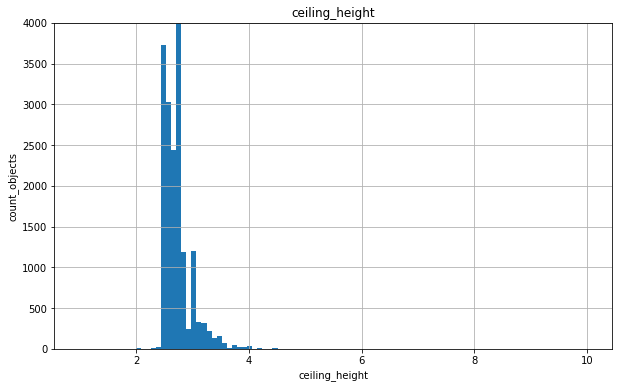

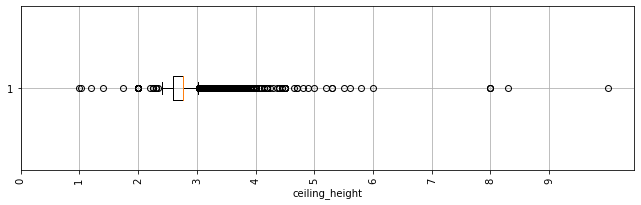

In [23]:
#уберем аномально высокие потолки, предположим, что потолок в 10 м ошибочно указали, имели в виду 1.0. Переведем все аномальные значения после 10 "м" в адекватные метры 
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 10, data['ceiling_height'] / 10)

#ceiling_height
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100, grid=True, range=(1,10), figsize=(10,6))
plt.xlabel('ceiling_height')
plt.ylim(0, 4000) #обрежем аномально высокие столбцы, вызванные заполнением пропусков
plt.ylabel('count_objects')
plt.title('ceiling_height')
plt.show()

#аналогично проверяем аномалии
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['ceiling_height'], vert=False)
ax.set_xlabel('ceiling_height')
ax.set_xticks(range(0, 10, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Аномалии в столбце были устранены таким образом, что потолки выше 10 метров принимались за ошибочные и делились на 10, чтобы перевести в значения, имеющиеся в виду. Больше всего квартир продается с потолками в диапазоне 2.3 - 3.0 м.
</div>

In [24]:
data['last_price'] = data['last_price']/1000000 # очень большие значения, лучше сократить до миллиона 

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


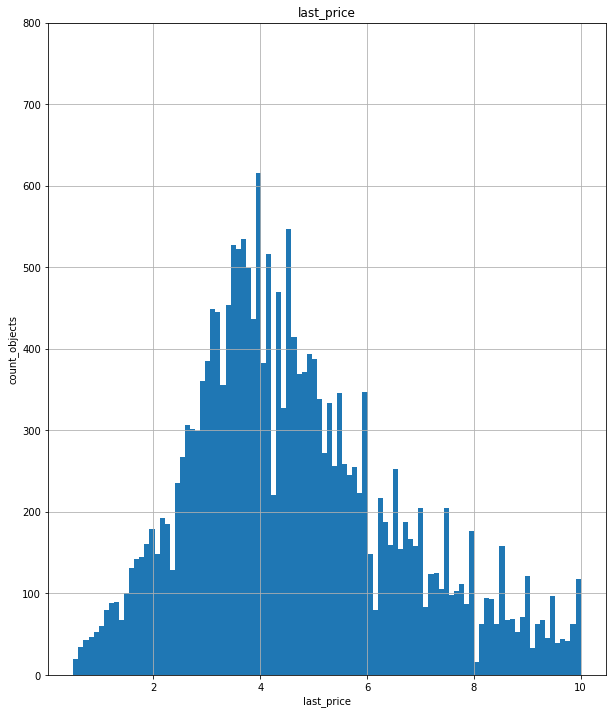

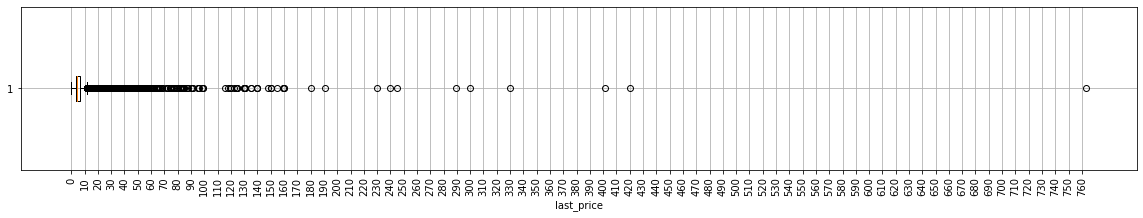

In [25]:
#last_price   
print(data['last_price'].describe())
data['last_price'].hist(bins=100, grid=True, figsize=(10,12), range=(0.5,10)) #не будем брать значения за пределами "усов", но и в "усы" попали странные значения, типа 0,012. Неясно, на что можно заменить эти значения, поэтому при рассмотрении графика мы не будем их брать в диапазон
plt.xlabel('last_price')
plt.ylabel('count_objects')
plt.ylim(0, 800) 
plt.title('last_price')
plt.show()

fig, ax = plt.subplots(figsize=(20, 3))
boxplot = ax.boxplot(data['last_price'], vert=False)
ax.set_xlabel('last_price')
ax.set_xticks(range(0, 763, 10))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [26]:
#удалим аномалии
data['last_price'] = data['last_price'].where((data['last_price'] < 11) & (data['last_price'] > 0.4))

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Аномалии срезаны из датафрейма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> После устранения аномалий стало заметно, что распределение объявлений по цене квартиры в миллионах напоминает распределение Пуассона. Больше всего квартир выставлено на продажу с ценой от 3 до 5 млн.
</div>

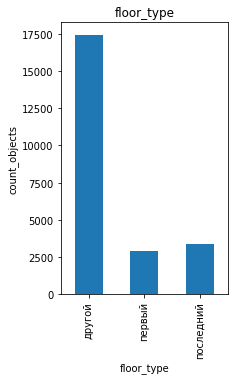

In [27]:
#floor_type
grouped_data = data.groupby('floor_type').size()
grouped_data.plot(kind='bar', figsize=(3, 5))
plt.xlabel('floor_type')
plt.ylabel('count_objects')
plt.title('floor_type')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> По итогам гистограммы видно, что меньше всего объявлений с квартирами на первом этаже. Соответственно, квартиры на последнем этаже чуть чаще выставляются на продажу. Вполне ожидаемо в топ входят квартиры на остальных этажах.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай внесем несколько правок в это задание:
<br>- построй каждый график отдельно и напиши отзыв под ним. Так будет проще соотносить график и вывод по нему
<br>- добавь больше конкретики в выводы. Небольшой метраж это сколько? Укажи диапазоны, где расположена большая часть квартир
<br>- у тебя график для категории этажей слился в один столбец, получается что все категории этажей есть в равном количестве? Сгруппируй по категориям и построй гистограмму
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> График по этажам перестроен) А выводы выше
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут ещё нужно убрать аномальные значения для потолков, стоимости квартиры, площади и количества комнат. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Количество отброшенных данных не должно превышать 10% от изначального объёма данных. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Аномалии остались (ты удалил только в столбце с потолками), их нужно удалить из датасета data, с которым ты работаешь далее. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить. Удали аномалии в столбцах с общей ценой, площадью и количеством комнат
</div>


<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> Все аномалии исключены
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

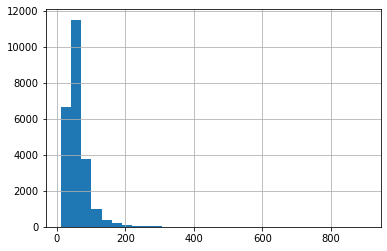

In [28]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


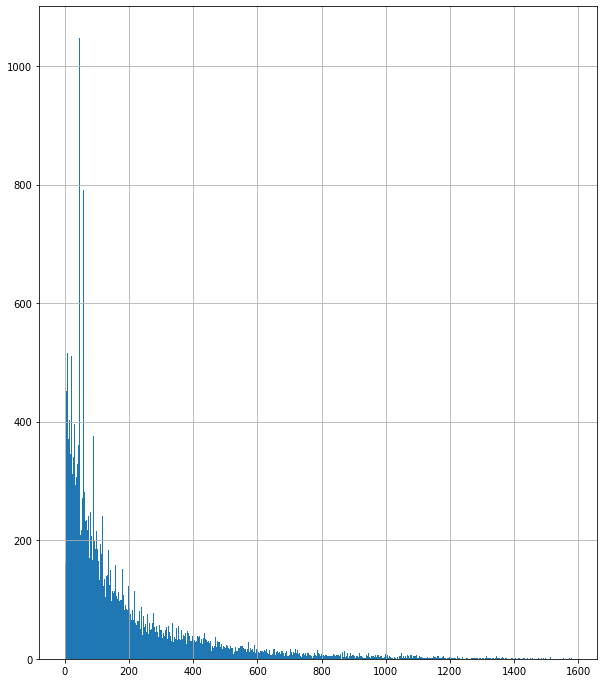

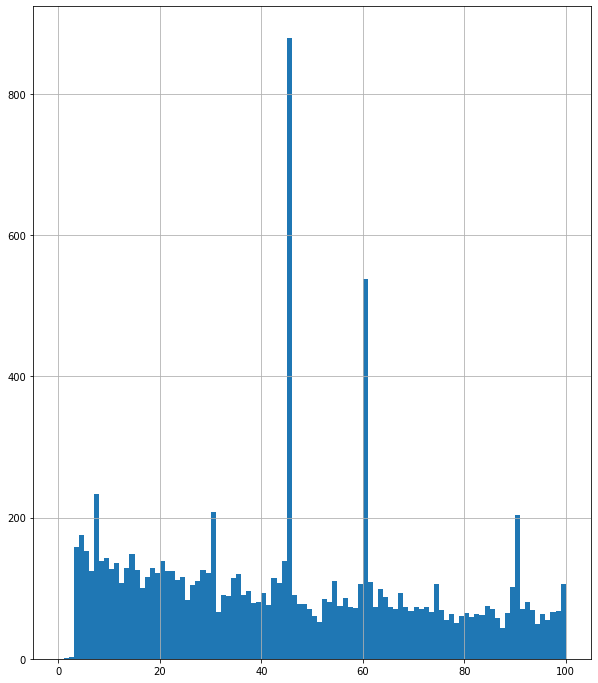

Медиана: 102.0
Среднее: 185.76537527817115


In [29]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=500,range=(0,1580), figsize=(10,12))
plt.show()

#посмотрим выбросы в ограничении до 100, там есть несколько столбцов подозрительно высоких
data['days_exposition'].hist(bins=100,range=(0,100), figsize=(10,12))
plt.show()

#выбросы есть в значениях 45 и 60 дней. еще есть маленькие выбросы там, где 30 и 90 дней. выглядит так, будто они автоматически закрылись(техническая ошибка?). Определить это сложно, нужно уточнять эту информацию, какова система автоматического закрытия объявлений, поэтому сейчас я просто исключу эти значения из расчетов

print('Медиана: ' + str(data.loc[~data['days_exposition'].isin([30, 45, 60, 90]), 'days_exposition'].median()))
print('Среднее: ' + str(data.loc[~data['days_exposition'].isin([30, 45, 60, 90]), 'days_exposition'].mean()))

<font color='teal'>***Какие продажи можно считать быстрыми, а какие — необычно долгими?***
На гистограмме видно, что постепенно "стихает" период продажи. По моему мнению, выбросами тут можно считать те значения, которые очень похожи на автоматическое списание. В остальном же, тенденция такая - большее кол-во продается до 200 дней,есть объявления, закрытые и через 1580 дней (4,3 года). Но в силу того, что гистограмма не похожа на обманчивую, я считаю, что и это возможно (к примеру, это квартира за высокую цену в селе, где рядом нет ни парков ни прудов, а еще половины информации по ней в объявлении)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметила эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

#### Изучим зависимость параметров от цены

Корреляция от общей площади = 0.6859255896844012


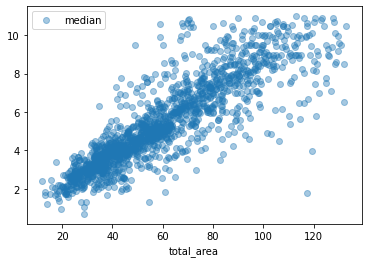

In [30]:
#от общей площади
totar = data.groupby('total_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
totar.plot(y='median',style='o',alpha=0.4)
print('Корреляция от общей площади = ' + str(data['total_area'].corr(data['last_price'])))
plt.show()


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> С увеличением площади увеличивается и стоимость квартиры. Коэффициент корреляции говорит нам о том, что площадь на 68% зависит от цены - чем больше, тем выше цена
</div>

Корреляция от жилой площади = 0.5351564222289464


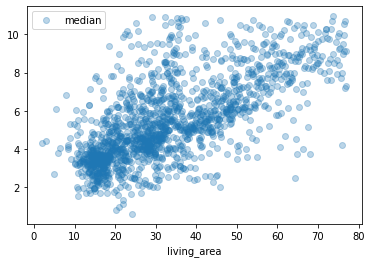

In [31]:
# от жилой площади
livar = data.groupby('living_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
livar.plot(y='median',style='o',alpha=0.3)
print('Корреляция от жилой площади = ' + str(data['living_area'].corr(data['last_price'])))
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> История с жилой площадью аналогична истории с общей площадью. разве что корреляция здесь не 66%, а 53%. Цифры могли бы получиться более близкими, если бы в общей площади нам не пришлось устранять пропуски
</div>

Корреляция от площади кухни = 0.32230152396113615


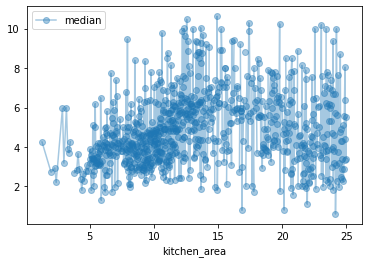

In [32]:
# от площади кухни
kiar = data.groupby('kitchen_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
kiar.plot(y='median',style='o-',alpha=0.4)
print('Корреляция от площади кухни = ' + str(data['kitchen_area'].corr(data['last_price'])))
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Корреляция от площади кухни совсем не высокая - всего 32%. Это может быть связано с тем, что ценообразование рассчитывается в большинстве случаев по общей площади или жилой площади
</div>

Корреляция от кол-ва комнат = 0.4424346769479774


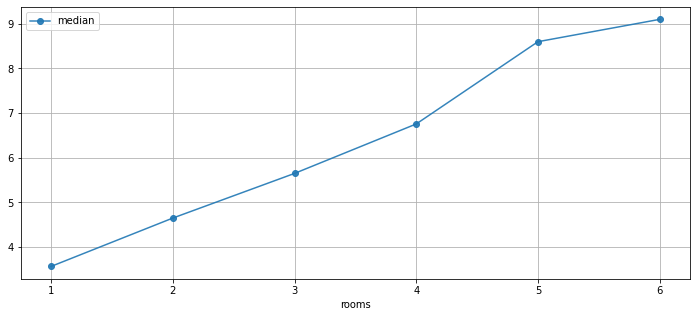

In [33]:
# количество комнат;
roo = data.groupby('rooms')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
roo.plot(y='median',alpha=0.9, figsize=(12,5), grid=True, style='o-')
print('Корреляция от кол-ва комнат = ' + str(data['rooms'].corr(data['last_price'])))
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В разборе зависимости цены от кол-ва комнат заметно, что часть данных срезалась по причине фильтрации цены квартиры. Таким образом, мы рассчитали корреляцию точнее, и ее коэффициент составил 44%.
</div>

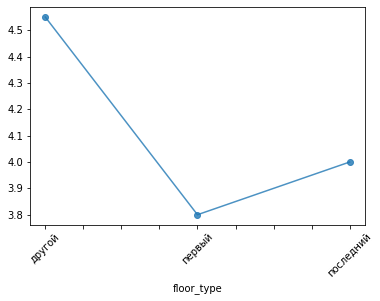

In [34]:
# типа этажа, на котором расположена квартира (первый, последний, другой);
floty = data.groupby('floor_type')['last_price'].agg('median')
floty.plot(y='count', style='o-', alpha=0.8)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Не совсем корректно рассматривать на графике 3 типа этажей. Выборка с типом "другой" в разы больше выборки по остальным типам. Если сравнить первый и последний этаж - то видно, что самые недорогие квартиры находятся на первом этаже (что можно объяснить не очень комфортным расположением), а квартиры на последнем этаже в среднем стоят на 0.2 млн. дороже тех, что на первом
</div>

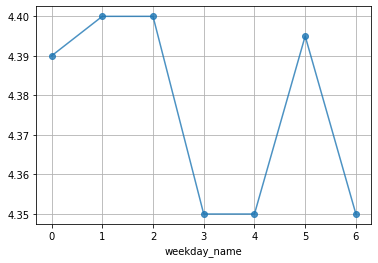

In [35]:
# даты размещения (день недели, месяц, год);
dat = data.groupby('weekday_name')['last_price'].agg('median')
dat.plot(x='weekday_name', y='last_price', style='o-', grid=True, alpha=0.8) 
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построив график зависимости видно, что в с понедельника по среду цены на квартиры устанавливаются больше, чем те, что ближе к выходным. При этом разницы между устанавливаемой ценой во второй половине недели нет, а с понедельника по среду цены на квартиры постепенно возрастают, обретая свой пик в среду
</div>

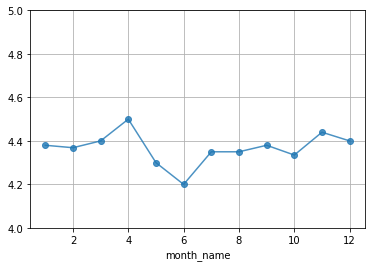

In [36]:
dat = data.groupby('month_name')['last_price'].agg('median')
dat.plot(x='month_name', y='last_price', ylim=(4, 5), style='o-', grid=True, alpha=0.8) 
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Зависимость цены от месяца публикации показывает, что самые низкие цены устанавливаются в период с мая по октябрь. Выше всего цены на квартиры в апреле, ноябре и декабре
</div>

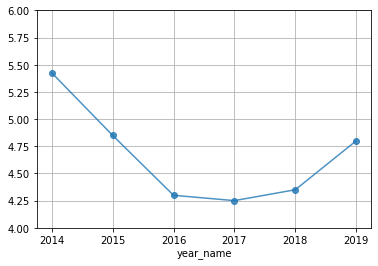

In [37]:
dat = data.groupby('year_name')['last_price'].agg('median')
dat.plot(x='year_name', y='last_price', ylim=(4, 6), style='o-', grid=True, alpha=0.8) 
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Самые высокие цены устанавливались в 2014-2015 году. Цены постепенно снижались с  2014 года по 2017. В 2017 был пик самой низкой средней цены квартиры, далее цены начали возрастать вплоть до 2019 года
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо рассчитать по отдельности зависимость для дня недели, месяца и года. Мы ведь для этого создавали отдельные столбцы
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Для категории этажа, дня недели, месяца и года ты считаешь количество объявлений, а нас интересует зависимость от цены. Значит нужно считать среднее или медиану

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> готово)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

In [38]:
#средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

local_gr = data.groupby('locality_name').agg({'floor': 'count', 'last_price': 'mean'})
local_srt = local_gr.sort_values('floor', ascending=False)
local_srt10 = local_srt.head(10)
top_pr = local_srt10['last_price'].idxmax()
low_pr = local_srt10['last_price'].idxmin()

print(local_srt10)
print()
print(colored('Населенный пункт с самой высокой стоимостью кв. м: ' + str(top_pr), 'green'))
print(colored('Населенный пункт с самой низкой стоимостью кв.м: ' + str(low_pr), 'red'))


                   floor  last_price
locality_name                       
Санкт-Петербург    15721    5.552160
поселок Мурино       556    3.652361
поселок Шушары       440    4.108082
Всеволожск           398    3.718778
Пушкин               369    5.316534
Колпино              338    3.839849
поселок Парголово    327    4.488075
Гатчина              307    3.423998
деревня Кудрово      299    4.204742
Выборг               237    3.180055

Населенный пункт с самой высокой стоимостью кв. м: Санкт-Петербург
Населенный пункт с самой низкой стоимостью кв.м: Выборг


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

<font color='teal'>***Изучили стоимость кв.метра в населениях с наибольшим кол-вом объявлений:***
    <font color='black'>Ожидаемо, на первом месте стоит СПб - это самый крупный город среди всех локаций, считается "второй столицей" России. Разумеется, и цены там самые высокие среди объявлений. Менее дорогим является Выборг. Изменения в цене можно объяснить по-разному. Какая-то локация дальше от Спб, какая-то ближе. Стоимость может складываться с общего состояния жилья, с его площади, с количества этажей в доме и т.д.

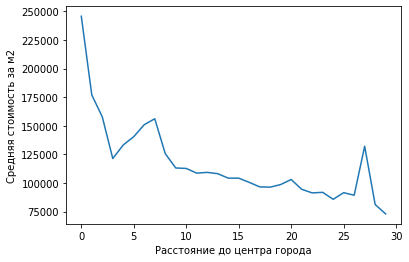

In [39]:
# Вычисляем среднюю цену каждого километра
grouped_data = data.loc[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest')['price_m2'].mean()
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Расстояние до центра города')
plt.ylabel('Средняя стоимость за м2')
plt.show()


<font color='teal'>***Изучили среднюю цену каждого километра в городе СПб:***
    <font color='black'> Опять же, все последовательно - чем квартира ближе к центру, тем она дороже, и наоборот

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Делить общую стоимость на расстояния до центра не нужно. Нужно построить график используя среднюю цену за квадратный метр и расстояние до центра в километрах
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> код изменен
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<div class="alert alert-info">
<b>P.S:</b>
<br> в описании к проекту ошибка: в шаге 4 пункте 5 пишется "Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга."
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>А в чем ошибка?
</div>

<div class="alert alert-info">
<b>Комментарий студента_v2:</b>
<br> А, ее и правда нет)
</div>

### Общий вывод

- *Цель исследования*:

Провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов недвижимости

- *Выводы*: 
  
    1. высокий процент корреляции цены квартиры с ее площадью - 65%. Это означает, что ее площадь оказывает очень сильное влияние ее ценообразование.
    2. еще одним важным фактором выступает сама локация квартиры, ее местоположение. Соответственно, квартиры в крупных городах стоят дороже, чем квартиры в небольших поселениях
    3. рассматривая квартиру в пределах крупного города стоит учитывать его близость к центру города - она также оказывает сильное влияние на цену квартиры 
    4. среднее влияние оказывает кол-во комнат в квартире. Это можно объяснить тем, что метраж квартиры больше говорит о размере квартиры, чем количество комнат, поэтому наличие нескольких крохотных комнат не может составить конкуренцию огромным апартаментам.
    5. этаж, на котором находится квартира, влияет на цену не сильно. Разве что наименьшей популярностью пользуются квартиры на первом этаже, поэтому на них цена, как правило, меньше

- *Описание данных*:

Входные данные были представлены банком — это архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет в формате csv-файла. Файл содержит информацию по квартирам, такую как:

    1. расстояние до ближайшего аэропорта в метрах (м)
    2. число балконов
    3. высота потолков (м)
    4. расстояние до центра города (м)
    5. сколько дней было размещено объявление (от публикации до снятия)
    6. дата публикации
    7. этаж
    8. всего этажей в доме
    9. апартаменты (булев тип)
    10. площадь кухни в квадратных метрах (м²)
    11. цена на момент снятия с публикации
    12. жилая площадь в квадратных метрах (м²)
    13. название населённого пункта
    14. свободная планировка (булев тип)
    15. число парков в радиусе 3 км
    16. расстояние до ближайшего парка (м)
    17. число водоёмов в радиусе 3 км
    18. расстояние до ближайшего водоёма (м)
    19. число комнат
    20. квартира-студия (булев тип)
    21. общая площадь квартиры в квадратных метрах (м²)
    22. число фотографий квартиры в объявлении

- *Порядок обработки аномалий, пропусков, дубликатов*:

В данных встретились такие ошибки, как: 

1. пропуски значений встречались во многих столбцах : *высота потолка, кол-во этажей, жилая площадь, апартамент(д\н), площадь кухни, наличие балкона, локация, расстояние до аэропорта, расстояние до центра города, кол-во парков поблизости, расстояние до ближайшего парка, кол-во прудов поблизости, расстояние до ближайшего пруда.*         
Пропуски в них заполнялись различными способами:

     1.1 столбцы в вариантами ответа "да\нет", а именно *апартамент* и *балкон*, были заменены на False, т.е. на ноль
     
     1.2 Локация была заменена на "Нет_данных' в столбце с пропусками
     
     1.3 Количество парков и прудов поблизости было заменено на 0 по принципу "не указали, потому что их нет"
     
     1.4 высота потолка была заполнена средним значением, так как потолки обычно не сильно отличаются в квартирах, и их можно заполнить без группировки
     
     1.5 средними значениями по области заполнили количество этажей, так как оно не может быть рассчитано для всех локаций (в крупном городе средним значением может быть 18 этажей, а в поселке - 2 этажа).
     
     1.6 Жилая площадь и площадь кухни были заполнены в зависимости от параметра "апартамент". Если у нас апартамент - тогда жилплощадь и кухня = общая площадь, так как отдельно кухню и жилую площадь выделить нельзя, они находятся в одной комнате, а значит равняются общей площадью. Если это не апартамент - делим общую площадь на кол-во комнат (примем кухню за комнату)
     
     1.7 Расстояние до центра, аэропорта, пруда и парка было заполнено средним значением по локации при условии, что она у нас не "Нет данных" и не крупный город (СПб), такая стратегия подойдет маленьким поселениям. Если город - Спб, тогда берем максимальное значения, так как город большой и некорректно указывать среднее расстояние для квартиры, рядом с которой, к примеру, на несколько километров парка или пруда. Если ни одна из стратегий не подошла, и в данных по-прежнему остались пропуски, признаем, что объекта рядом нет и ставим 0


2. Аномалии были обнаружены в столбце "комнаты" - нулевые значения были заменены на 1
3. Неявные дубликаты в столбце *название населённого пункта* были удалены методом анализа уникальных значений и последующей унификации однотипных признаков поселения

- *Предобаботка данных*:

Для проведения анализа были также добавлены столбцы:

1. цена одного квадратного метра 
2. день недели публикации объявления 
3. месяц публикации объявления
4. год публикации объявления
5. тип этажа квартиры (значения — «первый», «последний» или «другой»)
6. расстояние до центра города в километрах 

- *Проведенный анализ*

1. Было проведено исследование параметров (общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах) построения гистограмм и метода describe().
2. Изучено, как быстро продавались квартиры (столбец days_exposition) с помощью построения гистограммы на основе медианного значения
3. Проанализирована зависимость цены от таких факторов, как общая площадь, жилая площадь, кол-во комнат, типа этажа и дата размещения объявления с помощью построения графиков и вычислении корреляции методом corr()
4. Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений с помощью построения сводной таблицы с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов
5. Было проведено вычисление средней цены каждого километра до центра города в городе Санкт-Петербурге, а также построен график изменения средней цены для каждого километра от центра Петербурга

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- написать короткий вывод после первичного просмотра данных
<br>- корректно выполнить задание 4.1	
<br>- отбросить аномальные значения 
<br>- изучить зависимость цены от трёх столбцов по отдельности: день недели, месяц, год
<br>- корректно рассчитать стоимость каждого километра в последнем шаге

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 
<br>- корректно изучить зависимость цены от категории этажа, дня недели, месяца и года публикации 

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

1. [x]  открыт файл
2. [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
3. [X]  определены пропущенные значения
4. [X]  заполнены пропущенные значения там, где это возможно
5. [X]  есть пояснение, какие пропущенные значения обнаружены
6. [X]  изменены типы данных
7. [X]  есть пояснение, в каких столбцах изменены типы и почему
8. [X]  устранены неявные дубликаты в названиях населённых пунктов
9. [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
10. [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
11. [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
12. [X]  посчитано и добавлено в таблицу: месяц публикации объявления
13. [X]  посчитано и добавлено в таблицу: год публикации объявления
14. [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
15. [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
16. [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
17. [X]  построены гистограммы для каждого параметра
18. [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
19. [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
20. [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
21. [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
22. [X]  в каждом этапе есть промежуточные выводы
23. [X]  есть общий вывод